# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Description**

**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:



1.   Do the users spend more time on the new landing page than on the existing landing page? 
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.   Does the converted status depend on the preferred language?
4.   Is the time spent on the new page the same for the different language users?

**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.
user_id - Unique user ID of the person visiting the website
group - Whether the user belongs to the first group (control) or the second group (treatment)
landing_page - Whether the landing page is new or old
time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
converted - Whether the user gets converted to a subscriber of the news portal or not
language_preferred - Language chosen by the user to view the landing page



## Import all the necessary libraries

In [244]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [245]:
# import libraries to connect to google
# from google.colab import drive
# drive.mount('/content/drive')
# read the data
data = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [246]:
# first and last 5 rows views
data.head(-10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
85,546564,control,old,0.91,no,French
86,546465,treatment,new,6.71,no,English
87,546480,treatment,new,3.68,no,French
88,546447,treatment,new,3.30,no,French


On a overview all the column values appears normal

In [247]:
# shape of the data view.
data.shape

(100, 6)

The data set has 100 rows and 6 columns

In [248]:
# here is the DataFrame summary 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


1. All column has 100 non-null values which is same as number of rows, hence there are no missing values
2. group, landing_page, converter, language_preferred has string values so the data type is object it is the same as expected, so no treatment is required
3. user_id is a numerical column(int64) indicating the id of the user
4. time_spent_on_the_page is in float which is same as expected.

In [249]:
# statistical summary of the numerical columns of data view 
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


1. Only user_id and time_spent_on_the_page are numerical column.
2. user_id is just a unique id representing any individual user, this can be ignored.
3. time_spent_on_the_page is a valuable numerical insight
  1. There are 100 non null time_spent_on_the_page values
  2. sample_mean time_spent is 5.37
  3. sample standard deviation is 2.37
  4. minimum time spent on the page is 0.19
  5. maximum time spent on the page is 10.71
  6. 25%, 50%, 75% values are 3.88, 5,42, 7.02 respectively.


In [250]:
# checking number of unique user_ids to see if there are any duplicates
len(data['user_id'].unique())

100

There are no duplicate user_id found in this data

In [251]:
# view of the statistical summary of group
data['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

There are two types of groups
1. control - 50 users are of group control
2. treatment - 50 tratments are of group control

In [252]:
# view of the statistical summary of landing_page
data['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

There are two types of landing_page entries
1. new - 50 users are using new landing page
2. old - 50 users are using old landing page

In [253]:
# view of the statistical summary of converted
data['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

There are two types of converted entries
1. yes - 54 users are using new landing page
2. new - 46 users are using old landing page

In [254]:
# view of the statistical summary of language_preferred
data['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

Spanish, French and English are preferred languages of the cutomers of which 34 customers prefer spanish, 34 prefer french and 32 prefer english.


**Considering concise summary and statistical summary of data, We can conclude that there is no missing data found**

In [255]:
# checking for duplicates with user_id
bool_series = data["user_id"].duplicated()
data[bool_series]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


Since the duplicate bool_series is empty, There are no duplicated values in the data set

### Univariate Analysis

**Time spent on the page**

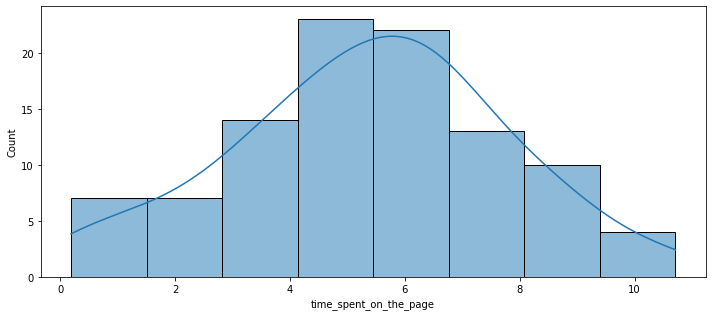

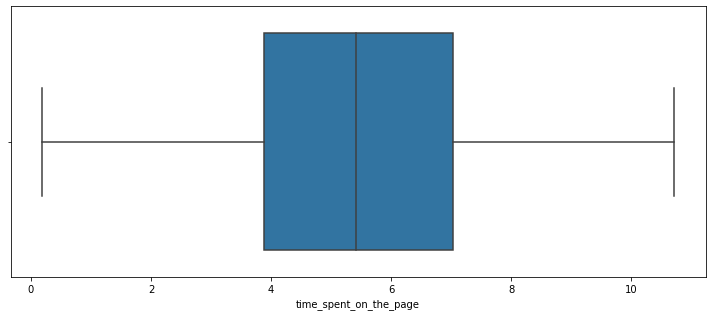

In [256]:
sns.histplot(data=data,x='time_spent_on_the_page',kde=True)
plt.show()
sns.boxplot(data=data,x='time_spent_on_the_page')
plt.show()

Observations:

```
Looking at the histplot the distribution seems to be a normal distibution
From boxplot we can infer there are no outliers
```




**Group**

control      50
treatment    50
Name: group, dtype: int64


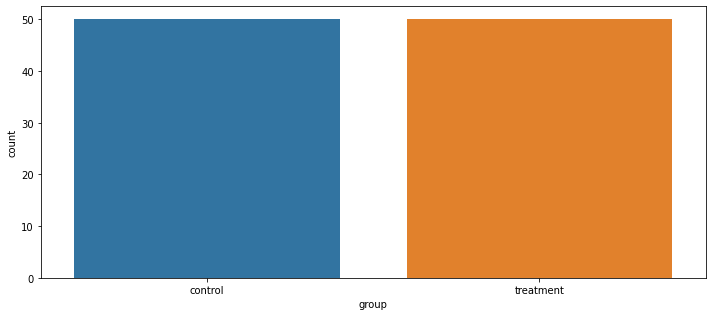

In [257]:
print(data['group'].value_counts())
sns.countplot(data=data,x='group')
plt.show()

Observations:


```
Control and Treament has almost equal number of users 
```


**Landing page**

old    50
new    50
Name: landing_page, dtype: int64


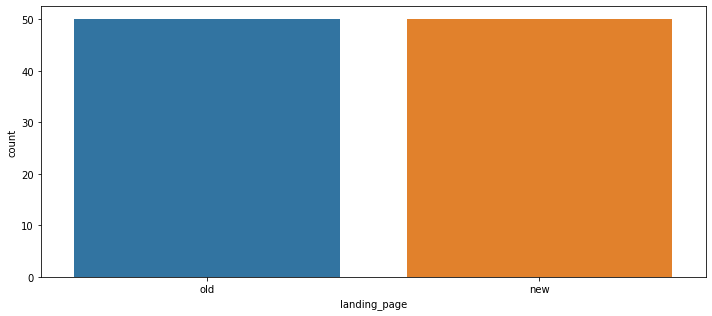

In [258]:
print(data['landing_page'].value_counts())
sns.countplot(data=data,x='landing_page')
plt.show()

Observations:


```
old landing page  and new landing page has almost equal number of users 
```



**Converted**

yes    54
no     46
Name: converted, dtype: int64


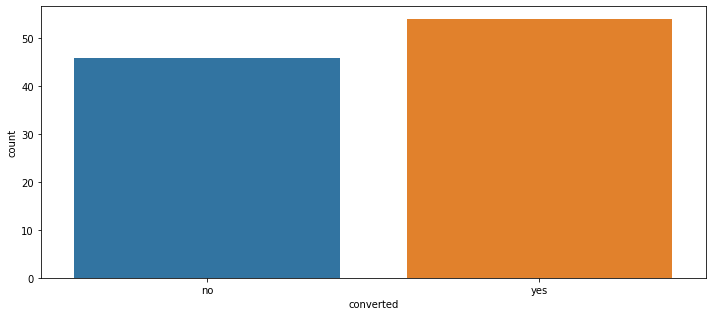

In [259]:
print(data['converted'].value_counts())
sns.countplot(data=data,x='converted')
plt.show()

Observations:



```
People who have converted to subscription is more than who have not.
```



**Language preferred**

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


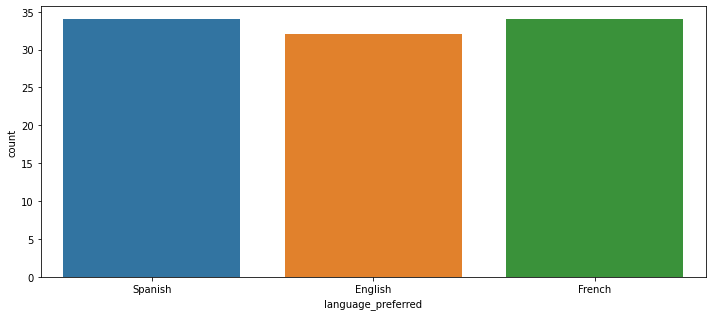

In [260]:
print(data['language_preferred'].value_counts())
sns.countplot(data=data,x='language_preferred')
plt.show()

Observations:

```
Spanish, English and French has almost equal amount of users.
English preferred users are little less compare to other two.
```


### Bivariate Analysis

### **Landing page vs Time spent on the page**

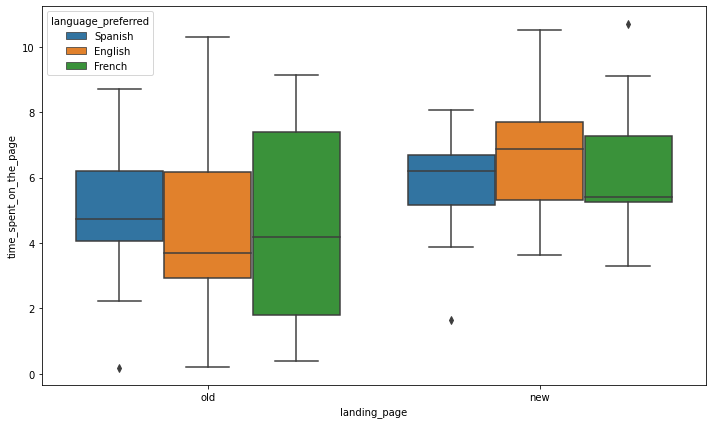

In [261]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='landing_page',y='time_spent_on_the_page', hue='language_preferred')
plt.show()

Observation:
    
    The time spent by the new page users are more than time spend by old page users. 
    There is a large mean_time_spent on page difference between old english page and new english page users.

### **Conversion status vs Time spent on the page**

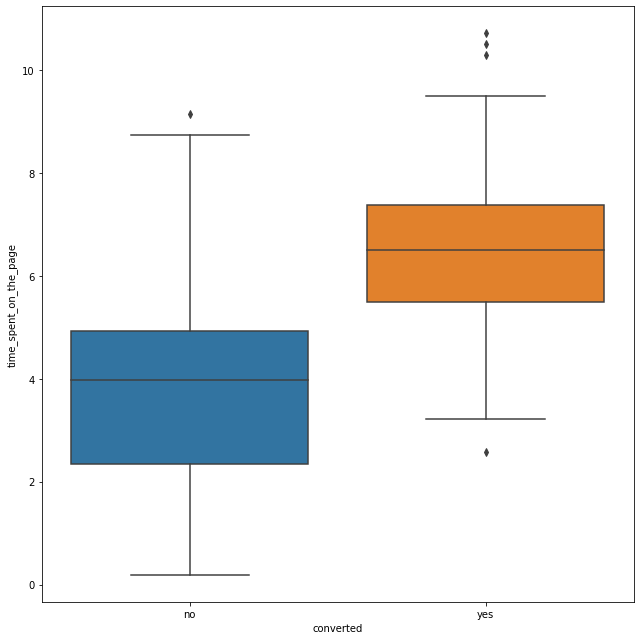

In [262]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = data, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

Observation:

People who have converted spend more time on the page.

Language preferred vs Time spent on the page

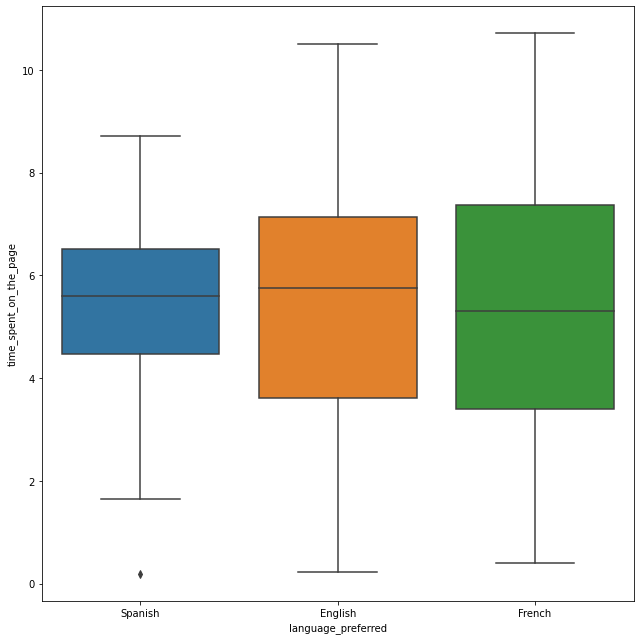

In [263]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = data, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

Observation:
    
1. Mean time spent on the page is almost same for all three languages
    

### **Converted count for each language preferred**

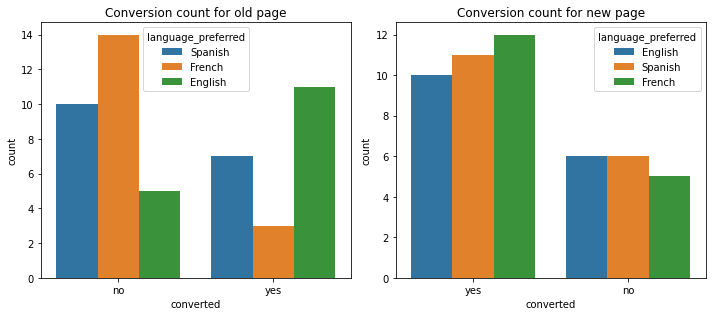

In [264]:
plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(data = data.loc[data['landing_page']=='old'], x = 'converted', hue='language_preferred', ax=axes[0])
axes[0].set_title('Conversion count for old page')
sns.countplot(data = data.loc[data['landing_page']=='new'], x = 'converted', hue='language_preferred', ax=axes[1])
axes[1].set_title('Conversion count for new page')
plt.show()

Old Page:

1. Spanish users => users who are converted is less than who have not
2. French users => users who are converted is very less than who have not
3. English users => users who are converted is more than who have not

New Page:

1. Spanish users => users who are converted is more than who have not
2. French users => users who are converted is more than who have not
3. English users => users who are converted is more than who have not

Conversion rate of Spanish users is significantly more in new page


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

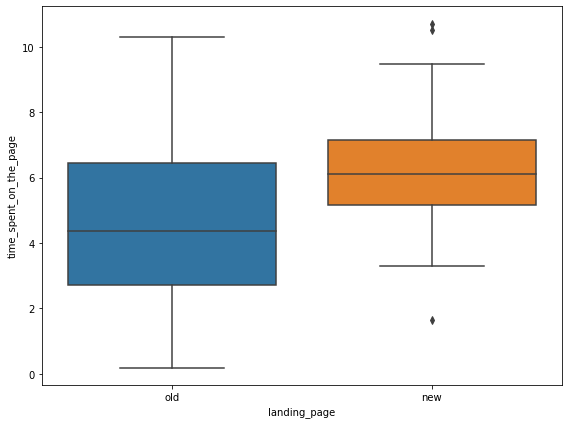

In [265]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data)
plt.show()

As per graph, we can conclude that new page mean time spent is greater than old page

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent by user on the landing page of new and old respectively

We want to test whether the mean time spent by user on new page is > mean time spent by the user on old page

We will test the null hypothesis

>$H_0:\mu_1<=\mu_2$ (mean_time_spent on new page is <= mean_time_spent on old page)

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$ (mean_time_spent on new page is > mean_time_spent on old page)

### Step 2: Select Appropriate test

Two Independent Sample T-test for Equality of Means

### Step 3: Decide the significance level

$\alpha = 0.05$

### Step 4: Collect and prepare data

In [266]:
time_spent_new = data[data['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = data[data['landing_page'] == 'old']['time_spent_on_the_page']
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, time_spent is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use two sample T-test for this problem.

### Step 5: Calculate the p-value

In [267]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new,time_spent_old,equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

p-value >  $\alpha$ : 0.0001392381225166549 < 0.05 

### Step 7:  Draw inference

As the p-value is much lesser than the level of significance, we reject the null hypothesis. Thus, it may be concluded that there is enough statistical evidence to conclude that mean_time_spent on new page is more than mean_time_spend on old page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### Perform Visual Analysis

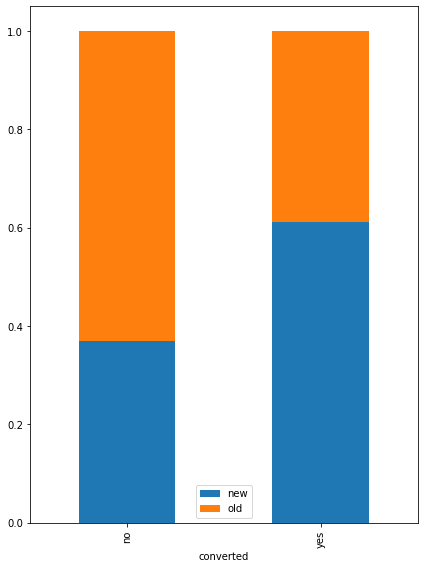

In [268]:
pd.crosstab(data['converted'],data['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

**Inference:**

New page users have a higher conversion rate than old page users

In [269]:
print(data[data['landing_page'] == 'new']['converted'].value_counts())
print(data[data['landing_page'] == 'old']['converted'].value_counts())

yes    33
no     17
Name: converted, dtype: int64
no     29
yes    21
Name: converted, dtype: int64


Check proportion of people conversion rate from new landing page to old landing page. 

In landing_page new, there are 33 converted out of 50 users and 
In landing_page old, there are 21 converted out of 50 users. 

At 5% level of significance, do we have enough statistical evidence to conclude that new landing page users gets converted more

### Appropriate test is 2 sample z-test

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

Let $\mu_1, \mu_2$ be the mean proportion of users converted from the landing page new and old respectively

We want to test whether the mean proportion of users converted from the new landing page is greater than mean proportion of users converted from the old landing page

We will test the null hypothesis (mean of new landing page <= mean of old landing page)

>$H_0:\mu_1<=\mu_2$

against the alternate hypothesis (mean of new landing page > mean of old landing page)

>$H_a:\mu_1>\mu_2$

In [270]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
user_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(user_count, nobs,alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


As the p-value is less than the significance level 0.05, we have enough statistical evidence to reject the null hypothesis. Thus, the user conversion rate of user landing on new page is greater than users landing on old page

## 3. Is the conversion and preferred language are independent or related?

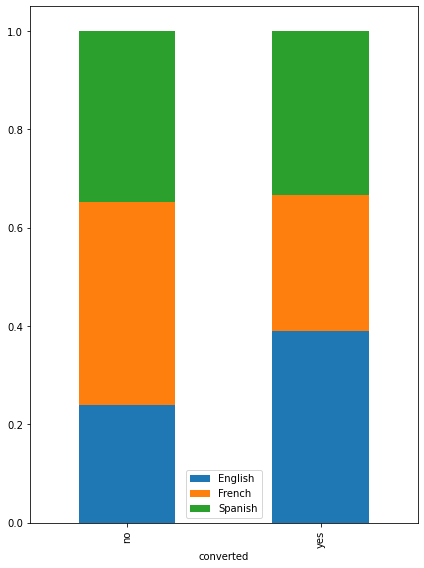

In [271]:
pd.crosstab(data['converted'],data['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

1. Spanish: converted and non converted rate is same
2. French: Converted is less than non converted
3. English: Converted is more than non converted

Let's write the null and alternative hypothesis

We will test the null hypothesis

𝐻0
:
  Conversion and language are independent.

against the alternate hypothesis

𝐻𝑎
:
  Conversion and language are not independent.

### The test to be used is Chi-Square Test of Independence
### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [272]:
# import the required function
from scipy.stats import chi2_contingency

data_crosstab = pd.crosstab(data['converted'],
                            data['language_preferred'], 
                               margins = False)
print(data_crosstab)
# find the p-value
chi, p_value, dof, expected = chi2_contingency(data_crosstab)
print('The p-value is', p_value)

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18
The p-value is 0.21298887487543447


p-value is higher than alpha value. Hence we fail to reject the null hypothesis, meaning conversion is independent of preferred language.

## 4. Is the time spent on the new page same for the different language users?

### This analysis can be done using One-way ANOVA Test


### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means time spent by users for languages English,French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language has different mean time compared to others.

  language_preferred  mean_time_spent
0            English         6.663750
1             French         6.196471
2            Spanish         5.835294


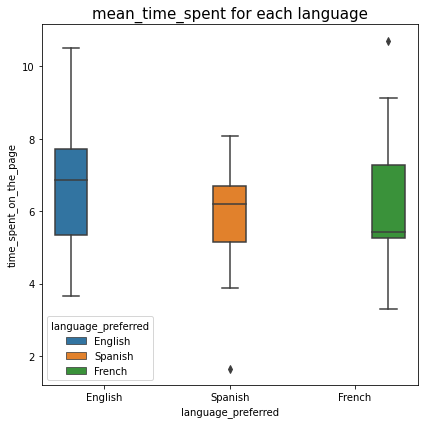

In [273]:
# mean_time_spent for each language
data_new = data.loc[data['landing_page']=='new']

# get the mean_time_spent for each language
print(data_new.groupby(['language_preferred']).agg(mean_time_spent=('time_spent_on_the_page','mean')).reset_index())


# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = data_new, hue = 'language_preferred')
a.set_title("mean_time_spent for each language", fontsize=15)
plt.show()

Inference:

mean_time_spent for each language is nearly between 6 to 7

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ mean_time_spent follows a normal distribution against

against the alternative hypothesis

>$H_a:$ mean_time_spent does not follow a normal distribution

In [274]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(data_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [275]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( data_new['time_spent_on_the_page'][data_new['language_preferred']=="English"], 
                                   data_new['time_spent_on_the_page'][data_new['language_preferred']=="Spanish"], 
                                   data_new['time_spent_on_the_page'][data_new['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [276]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(data_new.loc[data_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))


The p-value is 0.43204138694325955


### Insight
As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, have enough statistical significance to conclude that all statistical mean of time spent by different language customer is same.

## Conclusion and Business Recommendations

#### Over all Data Analysis:
1. The time spent on the page has a normal distribution
2. There are no outliers in time_spent_on_the_page
3. People who have converted to subscription is more than who have not
4. Spanish, English and French has almost equal amount of users
5. English preferred users are little less compared to other two
6. People who have converted spend more time on the page.
7. Mean time spent on the page is almost same for all three languages
8. All statistical mean of time spent by different language customer is same

#### New landing page analysis vs Old landing page analysis:
1. The time spent by the new page users are more than time spend by old page users
2. There is a significant increase in mean_time_spent for english users in new page than old page.
3. Conversion rate of Spanish users is significantly more in new page. 
4. There is an increase in time_spent_on_the_page from old landing page to new landing page
5. The user conversion rate of user landing on new page is greater than users landing on old page

#### Business Recomendations:
1. The audio, graphics, video, and other interactive elements seems to have better response over traditional newspapers
2. Overall new page has a better response from the user from all aspects 
3. To have a better understanding of individual feature, We can have seperated samples for audio, graphics, video and other interactive elements. Based on which we can derive better insights and work on individual feature for improvements.

___